<a href="https://colab.research.google.com/github/djs21905/Machine-Learning/blob/master/SmithAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIPLE LINEAR REGRESSION 


---
![alt text](https://i.paste.pics/f409813941c06744b344160cc924e846.png)


# Ingest






In [0]:
%matplotlib inline 
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/djs21905/e3db97b924ee4b301e14f8cc529c3390/raw/162a24d140933777ce519702d2ae36eb2487196a/boston.csv"
data = pd.read_csv(url)

# EDA

In [0]:
data.isna().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [0]:
data.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
data.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


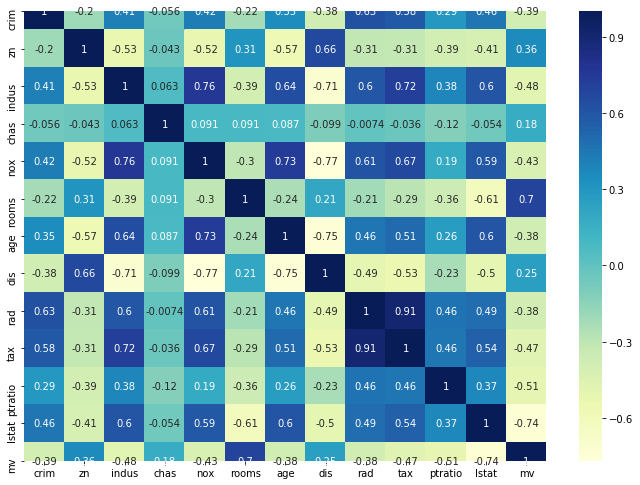

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(data.corr(),annot = True, cmap="YlGnBu", ax = ax)


In [0]:
data.shape

(506, 14)

In [0]:
data.columns

Index(['neighborhood', 'crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age',
       'dis', 'rad', 'tax', 'ptratio', 'lstat', 'mv'],
      dtype='object')

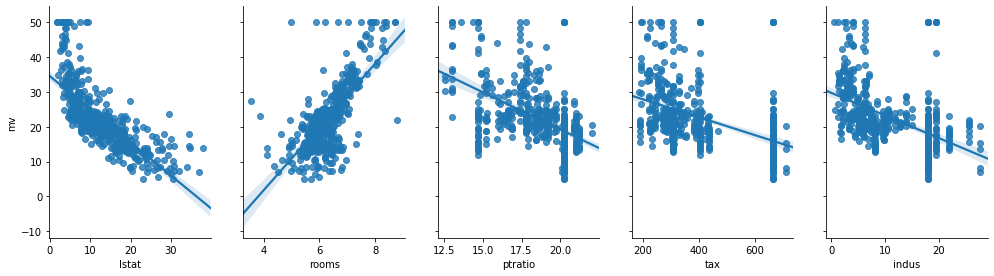

In [0]:
pairs = sns.pairplot(data, x_vars = ["lstat","rooms","ptratio","tax","indus"],y_vars=["mv"], kind = "reg", height = 4, aspect = 0.7)



In [0]:
## Looking for multicolinearity w/ cutoff of 0.80 correlation
vars_of_interest = data[["lstat","rooms","ptratio","tax","indus"]]
vars_of_interest.corr() 

,lstat,rooms,ptratio,tax,indus
lstat,1.000000,-0.613808,0.374044,0.543993,0.603800
rooms,-0.613808,1.000000,-0.355501,-0.292048,-0.391676
ptratio,0.374044,-0.355501,1.000000,0.460853,0.383248
tax,0.543993,-0.292048,0.460853,1.000000,0.720760
indus,0.603800,-0.391676,0.383248,0.720760,1.000000


In [0]:
vars_of_interest.corr() >= 0.80

,lstat,rooms,ptratio,tax,indus
lstat,True,False,False,False,False
rooms,False,True,False,False,False
ptratio,False,False,True,False,False
tax,False,False,False,True,False
indus,False,False,False,False,True


# Model

## Multiple Linear Regression

In [0]:
# Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [0]:
#Separating features and labels
x = data[["lstat","rooms","ptratio","age","nox"]]
y= data["mv"]
x = scaler.fit_transform(x)

In [0]:
# Train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.15)

In [0]:
#K fold cross-validation 
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
scor = ["r2","neg_mean_squared_error"]
lm = LinearRegression()
cross_val = cross_validate(lm,x_train, y_train , cv = 3, scoring = scor )
cross_val
cross_val_r2 = cross_val['test_r2'].mean()
cross_val_rmse= np.sqrt((cross_val['test_neg_mean_squared_error'].mean()*-1)) * 1000
cross_val_r2,cross_val_rmse

(0.65821962057925, 5463.925194542633)

In [0]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lm.coef_,lm.intercept_

(array([-4.51041469,  2.95279455, -1.95791821,  1.17336607, -0.7670862 ]),
 22.52715826864941)

In [0]:
y_pred = lm.predict(x_test)

In [0]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

str2 = "On average our models predicted test set values were approximately $ {} off from the test set expected values"
print(str2.format((rmse*1000)))

On average our models predicted test set values were approximately $ 3808.0317736971015 off from the test set expected values


In [0]:
r2 = lm.score(x_test, y_test) * 100
str3 = "{} % of the variability in Y can be explained using X"
print(str3.format(r2))

77.9856462402224 % of the variability in Y can be explained using X


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


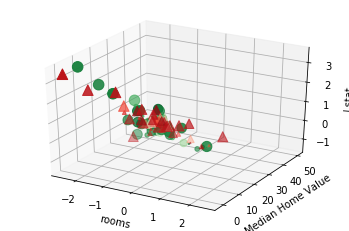

In [0]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,1], y_test, x_test[:,0], c=x_test[:,2],s = x_test[:,3] * 100, cmap='Greens');
ax.scatter3D(x_test[:,1], y_pred, x_test[:,0], c=x_test[:,2],s = x_test[:,3]* 100 , cmap='Reds', marker = '^');

ax.set_ylabel("Median Home Value")
ax.set_xlabel("rooms")
ax.set_zlabel("Lstat")
plt.show()


## ElasticNet

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

rm = ElasticNet()
scoring = ['neg_mean_squared_error','r2']

param_grid = [{'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.0] , 'l1_ratio': list(np.arange(0.1,1.1,0.1))}] 
grid_search = GridSearchCV(rm, param_grid, cv=3,
                           scoring=scoring,
                           return_train_score=True, refit=scoring[0])

In [0]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    1.0],
                          'l1_ratio': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                       0.6, 0.7000000000000001, 0.8, 0.9,
                                       1.0]}],
             pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
             return_train_score=True, scoring=['neg_mean_squared_error', 'r2'],
             verbose=0)

In [0]:
results = pd.DataFrame(grid_search.cv_results_)
mean_r2 = results.loc[results["rank_test_neg_mean_squared_error"] == 1,"mean_test_r2"]

In [0]:
# Best scores from cross validation
# (RMSE,Parameter Tunning, R2)

en_cross_val_rmse = np.sqrt((grid_search.best_score_ * -1)) * 1000
en_cross_val_rmse, grid_search.best_params_,mean_r2

(5456.906041785962, {'alpha': 0.1, 'l1_ratio': 0.1}, 0    0.659498
 Name: mean_test_r2, dtype: float64)

In [0]:
# RMSE of final model on test data
elastic_rmse = np.sqrt((grid_search.score(x_test,y_test) * -1)) * 1000
elastic_rmse

3731.192871978735

In [0]:
# Work around for finding the R2 value of ElasticNet Final model eval
elastic_r2 = ElasticNet(alpha= 0.1, l1_ratio=  0.1)

elastic_r2.fit(x_train,y_train)
elastic_r2_value = elastic_r2.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


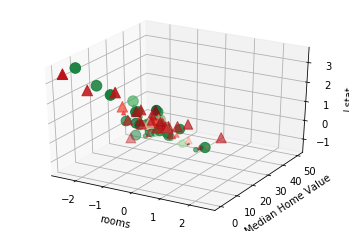

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,1], y_test, x_test[:,0], c=x_test[:,2],s = x_test[:,3] * 100, cmap='Greens');
ax.scatter3D(x_test[:,1], grid_search.predict(x_test), x_test[:,0], c=x_test[:,2],s = x_test[:,3]* 100 , cmap='Reds', marker = '^');

ax.set_ylabel("Median Home Value")
ax.set_xlabel("rooms")
ax.set_zlabel("Lstat")
plt.show()

# Conclusion

Cross-Val Comparison:

RMSE Linear Regression: 5463.93
RMSE ElasticNet: 5456.91
R2 Linear Regresssion: 65.82
R2 ElasticNet:65.95


Final Model Comparisons:

RMSE Linear Regression: 3808.03
RMSE ElasticNet: 3731.19
R2 Linear Regresssion: 77.99
R2 ElasticNet:78.87


Text(0.5, 0, 'Instance')

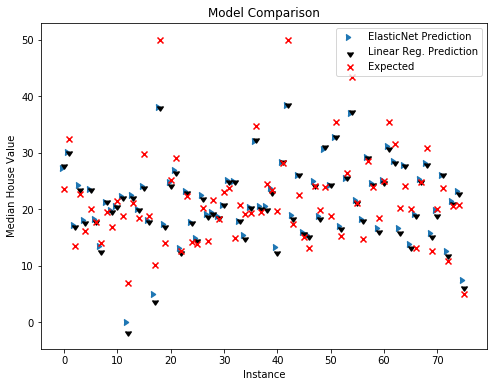

In [0]:

str5 = "Cross-Val Comparison:\n\nRMSE Linear Regression: {:.2f}\nRMSE ElasticNet: {:.2f}\nR2 Linear Regresssion: {:.2f}\nR2 ElasticNet:{:.2f}"

print(str5.format(cross_val_rmse,en_cross_val_rmse,cross_val_r2*100,float(mean_r2*100)))
str4 = "\n\nFinal Model Comparisons:\n\nRMSE Linear Regression: {:.2f}\nRMSE ElasticNet: {:.2f}\nR2 Linear Regresssion: {:.2f}\nR2 ElasticNet:{:.2f}"

print(str4.format(rmse*1000,elastic_rmse,r2,elastic_r2_value*100))


# graph plotting the expected values the elastic predicted and the linear model
plt.figure(figsize=(8,6))
plt.scatter(range(76),grid_search.predict(x_test), label = "ElasticNet Prediction", marker = 5)
plt.scatter(range(76),y_pred, color = "black", label = "Linear Reg. Prediction", marker = 11)
plt.scatter(range(76),y_test, color = "red", label = "Expected", marker = 'x')
plt.legend()
plt.title("Model Comparison")
plt.ylabel("Median House Value")
plt.xlabel("Instance")


